## Fourier transforms

In [42]:
from scipy import signal
import scipy.fftpack as FFT
import matplotlib.pyplot as plt
import numpy as np

##  Fourier Analysis of Nonlinear Oscillations <a id="12.1"></a>


Consider a particle oscillating either in the nonharmonic potential of
(8.5):

$$\tag*{12.1} V(x) = \frac{1}{p} k |x|^{p}, \qquad p\neq 2,$$

or in the perturbed harmonic oscillator potential (8.2),

$$\tag*{12.2} V(x) = \frac{1}{2}kx^{2}\left(1 - \frac{2}{3}\alpha x\right).$$

While free oscillations in these potentials are always periodic, they
are not sinusoidal. Your **problem** is to take the solution of one of
these nonlinear oscillators and expand it in a Fourier basis:

$$\tag*{12.3} x(t) = A_{0} \sin(\omega t + \phi_{0}).$$

For example, if your oscillator is sufficiently nonlinear to behave like
the sawtooth function (Figure 12.1 A), then the Fourier spectrum you
obtain should be similar to that shown in Figure 12.1 B.

In general, when we undertake such a spectral analysis we want to
analyze the steady-state behavior of a system. This means that we have
waited for the initial transient behavior to die out. It is easy to
identify just what the initial transient is for linear systems, but may
be less so for nonlinear systems in which the “steady state” jumps among
a number of configurations. In the latter case we would have different
Fourier spectra at different times.

##  Fourier Series (Math) <a id="12.2"></a>

Part of our interest in nonlinear oscillations arises from their lack of
study in traditional physics courses where linear oscillations, despite
the fact that they are just a first approximation, are most often
studied. If the force on a particle is always toward its equilibrium
position (a restoring force), then the resulting motion will be
*periodic*, but not necessarily *harmonic*. A good example is the motion
in a highly anharmonic potential with $p \simeq 10$ in (12.1) that
produces an $x(t)$ looking like a series of pyramids; this motion is
periodic but not harmonic.

In a sense, our approach is the inverse of the traditional one in which
the *fundamental* oscillation is determined analytically and the
higher-frequency *overtones* are determined by perturbation theory
\[[Landau & Lifshitz(76)](BiblioLinked.html#LL)\]. We start with the full (numerical) periodic
solution and then decompose it into what may be called *harmonics.* When
we speak of fundamentals, overtones, and harmonics, we speak of
solutions to the linear *boundary-value problem*, for example, of waves
on a plucked violin string. In this latter case, and when given the
correct conditions (enough musical skill), it is possible to excite
individual harmonics or sums of them in the series

$$\tag*{12.4} y(t) = b_{0} \sin\omega_{0} t + b_{1} \sin {2\omega_{0} t} +
\cdots.$$

Anharmonic oscillators vibrate at a single frequency (which may vary
with amplitude) but not with a sinusoidal waveform. Although it is
mathematically proper to expand nonlinear oscillations in a Fourier
series, this does not imply that the individual harmonics can be excited
(played).

You may recall from classical mechanics that the general solution for a
vibrating system can be expressed as the sum of the *normal modes* of
that system. These expansions are possible only if we have *linear
operators* and, subsequently, the *principle of superposition*: If
$y_{1}(t)$ and $y_{2}(t)$ are solutions of some linear equation, then
$ \alpha_{1}y_{1}(t) +
\alpha_{2}y_{2}(t)$ is also a solution. The principle of linear
superposition does not hold when we solve nonlinear problems.
Nevertheless, it is always possible to expand a *periodic* solution of a
*nonlinear* problem in terms of trigonometric functions with frequencies
that are integer multiples of the true frequency of the nonlinear
oscillator.\[*Note:* We remind the reader that every periodic system by
definition has a period $T$ and consequently a true frequency $\omega$.
Nonetheless, this does not imply that the system behaves like
$\sin\omega t$. Only harmonic oscillators do that.\] This is a
consequence of *Fourier’s theorem* being applicable to any single-valued
periodic function with only a finite number of discontinuities. We
assume we know the period $T$, that is, that

$$\tag*{12.5} y(t+T) = y(t).$$

This tells us the *true frequency* $\omega$:

$$\tag*{12.6}
\omega \equiv \omega_1 =\frac{2\pi}{T}.$$

A periodic function (usually designated as the *signal*) can be expanded
as a series of harmonic functions with frequencies that are multiples of
the true frequency:

$$\tag*{12.7}
 y(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left(a_{n} \cos
n\omega t + b_{n} \sin n\omega t
\right).$$

This equation represents the signal $y(t)$ as the simultaneous sum of
pure tones of frequency $n\omega$. The coefficients $a_{n}$ and $b_{n}$
measure of the amount of $\cos n\omega t$ and $\sin
n\omega t$ present in $y(t)$ respectively. The intensity or power at
each frequency is proportional to $a_n^2+b_n^2$.

The Fourier series (12.7) is a “best fit” in the least-squares sense,
because it minimizes $\sum_{i} [y(t_{i})-y_{i}]^{2}$, where $i$ denotes
different measurements of the signal. This means that the series
converges to the *average* behavior of the function, but misses the
function at discontinuities (at which points it converges to the mean)
or at sharp corners (where it overshoots). A general function $y(t)$ may
contain an infinite number of Fourier components, although low-accuracy
reproduction is usually possible with a small number of harmonics.

The coefficients $a_{n}$ and $b_{n}$ in (12.7) are determined by the
standard techniques for orthogonal function expansion. To find them,
multiply both sides of (12.7) by $\cos n\omega t$ or $\sin
n\omega t$, integrate over one period, and project a single $a_{n}$ or
$b_{n}$:

$$\tag*{12.8}
  {a_n\choose b_n} = \frac{2}{T} \int _{0}^{T} dt {\cos n\omega
t\choose \sin n\omega t} y(t), \quad \omega  =  \frac{2\pi}{T}.$$

As seen in the $b_n$ coefficients (Figure 12.1 right), these
coefficients usually decrease in magnitude as the frequency increases,
and can enter with a negative sign, the negative sign indicating
relative phase.

Awareness of the *symmetry* of the function $y(t)$ may eliminate the
need to evaluate all the expansion coefficients. For example,

- $a_{0}$ is twice the average value of $y$:
$$\tag*{12.9}
    a_{0} = 2 \left\langle y(t)\right\rangle.$$

-   For an *odd function*, that is, one for which $y(-t) = - y(t)$, all
    $a_{n}$ coefficients $\equiv 0$, and only half of the integration
    range is needed to determine $b_{n}$:

    $$\tag*{12.10}
    b_{n} = \frac{4}{T} \int _{0}^{T/2} dt\ y(t) \sin n\omega t.$$

    However, if there is no input signal for $t<0$, we do not have a
    truly odd function, and so small values of $a_n$ may occur.

-   For an *even function*, that is, one for which $y(-t) =
    y(t)$, all $b_{n}$ coefficient $\equiv 0$, and only half the
    integration range is needed to determine $a_{n}$:

    $$\tag*{12.11}
    a_{n} = \frac{4}{T} \int _{0}^{T/2} dt\ y(t) \cos n\omega t .$$

![image](Figs/Fig12_1.png)

**Figure 12.1** *Top:* A sawtooth function that repeats infinitely in time.
*Bottom:* The Fourier spectrum of frequencies contained in this function
(natural units). See too Figure 1.9 in which we show the result of summing a
finite number of terms of this series.

### 12.2.1  Examples: Sawtooth & Half-Wave Functions<a id="12.2.1"></a>

The sawtooth function (Figure 12.1) is described mathematically as

$$\tag*{12.12} y(t) =\begin{cases}
\frac{t}{T/2}, & for\ 0\leq t \leq \frac{T}{2},\
\frac{t-T}{ T/2}, & for \ \frac{T}{2} \leq t \leq T.
\end{cases}$$

It is clearly periodic, nonharmonic, and discontinuous. Yet it is also
odd and so can be represented more simply by shifting the signal to the
Top:

$$\tag*{12.13} y(t) = \frac{t}{T/2}, \quad -\frac{T}{2} \leq t \leq \frac{T}{2}.$$

Although the general shape of this function can be reproduced with only
a few terms of the Fourier components, many components are needed to
reproduce the sharp corners. Because the function is odd, the Fourier
series is a sine series and (12.8) determines the $b_n$ values:

$$\begin{align} \tag*{12.14}
b_{n} & =  \frac{2}{T} \int\limits_{-T/2}^{+T/2} dt  \sin n\omega t \frac{t} { T/2} =
\frac{2}{n\pi}(-1)^{n+1},  \\
\Rightarrow\quad    y(t) & =  \frac{2}{\pi} \left[\sin \omega t - \frac{1}{2} \sin 2\omega t + \frac{1}{3} \sin 3\omega t - \cdots
\right].\tag*{12.15}\end{align}$$

The half-wave function 

$$\tag*{12.16} 
y(t) =\begin{cases} \sin \omega t, & for  \ 0<t< T/2 , \\
 0, & for \ T/2 < t < T, \end{cases}$$

is periodic, nonharmonic (the upper half of a sine wave), and continuous, but
with discontinuous derivatives. Because it lacks the sharp corners of the
sawtooth function, it is easier to reproduce with a finite Fourier series. Equation
(12.8) determines 

$$\begin{align}
 a_{n} & =\begin{cases}
 \frac{-2}{\pi(n^2-1)}, & n\  \mbox{even or  0},\\
 0, & n\  \mbox{odd},\\
\end{cases}  \\
 b_{n} &=\begin{cases}
 \frac{1}{2}, & n = 1,\\
 0, & n \neq 1,
\end{cases}\\
\Rightarrow\quad    y(t) & =  \frac{1}{2} \sin \omega t +
\frac{1}{\pi} - \frac{2}{3\pi} \cos 2\omega t - \frac{2}{15\pi}
\cos 4 \omega t + .\tag*{12.17}\end{align}$$

## 12.3  Exercise: Summation of Fourier Series <a id="12.3"></a>

Write a program that performs the summation of the Fourier series for the sawtooth and half-wave functions:

1.  **Sawtooth function:** Sum the Fourier series for the *sawtooth
    function* up to order $n= 2, 4, 10, 20$, and plot the results over
    two periods.

    1.  Check that in each case the series gives the mean value of the
        function *at* the points of discontinuity.

    2.  Check that in each case the series *overshoots* by about 9% the
        value of the function on either side of the discontinuity (the
        *Gibbs phenomenon*).

2.  **Half-wave function:** Sum the Fourier series for the *half-wave
    function* up to order $n=2, 4, 10$,5 and plot the results over
    two periods. (The series converges quite well, doesn’t it?)

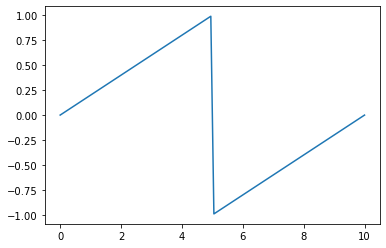

In [43]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt

T=10
t=np.linspace(0,T,100)
y1=np.zeros(100)
for i in range(100):
    if 0 <= t[i] <= T/2:
        y1[i] = t[i]/(.5*T) 
    elif T/2 <= t[i] <= T:
        y1[i]=(t[i]-T)/(T/2)

plt.plot(t,y1)



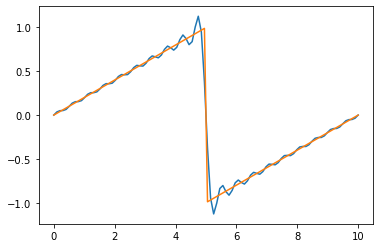

In [44]:
n=20
w=(2*np.pi)/T
#w=1
y=np.zeros(100)
for i in range(1,n):
    y += 2/(np.pi*i)*(-1)**(i+1)*np.sin(i*w*t)
plt.plot(t,y)
plt.plot(t,y1)

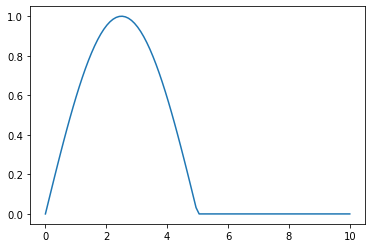

In [45]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt
T=10

for i in range(len(t)):
    if 0 < t[i] < T/2:
        y[i]=np.sin(w*t[i])
    elif T/2 < t[i] < T:
        y[i]=0
plt.plot(t,y)

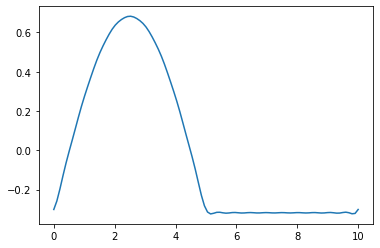

In [46]:
n=20
w=(2*np.pi)/T
#w=1
y1=np.zeros(100)
for i in range(1,n):
    if i == 0 or i%2==0:
        y1 += -2/(np.pi*(i**2-1))*np.cos(i*w*t)
        #print('working')
    if i%2 != 0:
        y1 += 0
        #print('working1')
    if i == 1: 
        y1 += .5*np.sin(i*w*t)
       # print('working2')

plt.plot(t,y1)


## 12.4  Fourier Transforms (Theory)<a id="12.4"></a>

Although a Fourier *series* is the right tool for approximating or
analyzing periodic functions, the Fourier *transform* or *integral* is
the right tool for nonperiodic functions. We convert from series to
transform by imagining a system described by a continuum of
“fundamental” frequencies. We thereby deal with *wave packets*
containing continuous rather than discrete frequencies.\[*Note:* We
follow convention and consider time the function’s variable and
frequency the transform’s variable. Nonetheless, these can be reversed
or other variables such as position and wave vector may also be used.\]
While the difference between series and transform methods may appear
clear mathematically, when we approximate the Fourier integral as a
finite sum, the two become equivalent.

By analogy with (12.7), we now imagine our function or signal $y(t)$
expressed in terms of a continuous series of harmonics (*inverse Fourier
transform*):[{xml}](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/xml/12.18.xml)

$$\tag*{12.18}
  y(t)    = \int_{-\infty}^{+\infty} d\omega\
Y(\omega)  \frac{e^{i\omega t}} {
\sqrt{2\pi}},$$

where for compactness we use a complex exponential function.\[*Note:*
Recall that $\exp(i\omega t) = \cos \omega t + i \sin
\omega t$, and with the law of linear superposition this means that the
real part of $y$ gives the cosine series, and the imaginary part the sine series.\]
The expansion amplitude $Y(\omega)$ is analogous to the Fourier coefficients
$(a_{n},b_{n})$, and is called the *Fourier transform* of $y(t)$. The integral
(12.18) is the inverse transform because it converts the transform to the signal.
The *Fourier transform* converts the signal $y(t)$ to its transform[{xml}](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/xml/12.19.xml)

$Y(\omega)$:
$$\begin{align}
\tag*{12.19}
  Y(\omega) = \int_{-\infty}^{+\infty} dt
\frac{e^{-i\omega t}} {\sqrt{2\pi}} y(t) .\end{align}$$ 

The
$1/\sqrt{2\pi}$ factor in both these integrals is a common normalization
in quantum mechanics, but maybe not in engineering where only a single
$1/2\pi$ factor is used. Likewise, the signs in the exponents are also
conventions that do not matter as long as you maintain consistency.

If $y(t)$ is the measured response of a system (signal) as a function of
time, then $Y(\omega)$ is the *spectral function* that measures the
amount of frequency $\omega$ present in the signal. In many cases it
turns out that $Y(\omega)$ is a complex function with both positive and
negative values, and with powers-of-ten variation in magnitude.
Accordingly, it is customary to eliminate some of the complexity of
$Y(\omega)$ by making a semilog plot of the squared modulus
$\left| Y(\omega)\right|^{2}$ *versus* $\omega$. This is called a *power
spectrum* and provides an immediate view of the amount of power or
strength in each component.

If the Fourier transform and its inverse are consistent with each other, we
should be able to substitute (12.18) into (12.19) and obtain an identity:

$$\begin{align} \tag*{12.20}
Y(\omega) & =  \int_{-\infty}^{+\infty}\! dt  \frac{e^{-i\omega
t}}{\sqrt{2\pi}} \int_{-\infty}^{+\infty}    d\omega'
\frac{e^{i\omega' t}}{\sqrt{2\pi}} Y(\omega')  \\
&\!=\! \int_{-\infty}^{+\infty} d\omega'\left\{\int_{-\infty}^{+\infty}
dt \frac{e^{i(\omega'-\omega) t}}{2\pi} \right\}Y(\omega').\tag*{12.21}
 \end{align}$$

For this to be an identity, the term in braces must be the *Dirac delta
function*:

$$\tag*{12.22}
\int_{-\infty}^{+\infty} dt  e^{i(\omega'-\omega) t} = 2\pi
 \delta (\omega'-\omega).$$

While the delta function is one of the most common and useful functions
in theoretical physics, it is not well behaved in a mathematical sense
and misbehaves terribly in a computational sense. While it is possible
to create numerical approximations to $\delta(\omega' -\omega)$, they
may well be borderline pathological. It is certainly better for you to
do the delta function part of an integration analytically and leave the
nonsingular leftovers to the computer.

## 12.5  The Discrete Fourier Transform <a id="12.5"></a>

If $y(t)$ or $Y(\omega)$ is known analytically or numerically, the
integral (12.18) and (12.19) can be evaluated using the integration
techniques studied earlier. In practice, the signal $y(t)$ is measured
at just a finite number $N$ of times $t$, and these are all we have as
input to approximate the transform. The resultant *discrete Fourier
transform*
is an approximation both because the signal is not known for all times,
and because we must integrate numerically. Once
we have a discrete set of (approximate) transform values, they can be
used to reconstruct the signal for any value of the time. In this way
the DFT can be thought of as a technique for interpolating, compressing,
and extrapolating the signal.

We assume that the signal $y(t)$ is sampled at $(N+1)$ discrete times ($N$
time intervals), with a constant spacing $\Delta t = h$ between times:

$$\begin{align} \tag*{12.23}
y_{k} & =  y(t_{k}),\qquad & k &=0,1,2,\ldots, N, \\
t_{k} &{ = } k h, \qquad &h  =\Delta t.\tag*{12.24}
\end{align}$$ 

In other words, we measure the signal
$y(t)$ once every $h^{th}$ of a second for a total time of $T$. This
correspondingly define the signal’s period $T$ and the *sampling rate* $s$:

 $$T= Nh, \qquad s = \frac{N}{T} = \frac{1}{h}.\tag*{12.25}$$

Regardless of the true
periodicity of the signal, when we choose a period $T$ over which to sample the
signal, the mathematics will inevitably produce a $y(t)$ that is periodic with
period $T$, 

$$\tag*{12.26}
 y(t+T) = y(t).$$ 
 
We recognize this periodicity, and ensure that there
are only $N$ independent measurements used in the transform, by defining the
first and last $y$’s to be equal:

$$\begin{align}
\tag*{12.27}
 y_0 = y_N.\end{align}$$
 
If we are analyzing a truly periodic
function, then the $N$ points should span one complete period, but not
more. This guarantees their independence. Unless we make further
assumptions, the $N$ independent data $y(t_{k})$ can determine no more
than $N$ independent transform values
$Y(\omega_{k}),   k= 0, \ldots, N$.

The time interval $T$ (which should be the period for periodic
functions) is the largest time over which we measure the variation of
$y(t)$. Consequently, it determines the lowest frequency contained in
our Fourier representation of $y(t)$,

$$\tag*{12.28}
\omega_1 = \frac{2 \pi}{T}.$$

The full range of frequencies in the spectrum $\omega_n$ are determined
by the number of samples taken, and by the total sampling time $T=Nh$ as

$$\tag*{12.29}
\omega_{n} = n \omega_1= n \frac{2\pi}{Nh}, \qquad n =0,
1,\ldots,N.$$

Here $\omega_0=0$ corresponds to the zero-frequency or DC component of
the transform, that is, the part of the signal that does not oscillate.

We see from (12.29) that the larger we make the time $T=Nh$ over which
we sample the function, the smaller will be the frequency steps or
resolution.\[*Note:* See also §12.5.1 where we discuss the related
phenomenon of aliasing.\] Accordingly, if you want a smooth frequency
spectrum, you need to have a small frequency step $2\pi/T$, which means
a longer observation time $T$. While the best approach would be to
measure the input signal for all times, in practice a measured signal
$y(t)$ is often extended in time (“padded”) by adding zeros for times
beyond the last measured signal, which thereby increases the value of
$T$ artificially. Although this does not add new information to the
analysis, it does build in the experimentalist’s view that the signal
has no existence, or no meaning, at times after the measurements are
stopped.

While periodicity is expected for a Fourier *series*, it is somewhat
surprising for Fourier a *integral*, which have been touted as the right
tool for nonperiodic functions. Clearly, if we input values of the
signal for longer lengths of time, then the inherent period becomes
longer, and if the repeat period $T$ is very long, it may be of little
consequence for times short compared to the period. If $y(t)$ is
actually periodic with period $Nh$, then the DFT is an excellent way of
obtaining Fourier series. If the input function is not periodic, then
the DFT can be a bad approximation near the endpoints of the time
interval (after which the function will repeat) or, correspondingly, for
the lowest frequencies.

Although it could be educational to write our own version of a discrete Fourier transform algorithm, given the ubiquitous role that Fourier transform have in innumerous fields, there exist very efficient techniques that optimize the preformance of the operations. In particular, the
*fast Fourier
transform*
algorithm, evaluates the
the DFT as a matrix multiplication of a vector of length
$N$ containing the $Z$ values by a vector of length $N$ of $y$ value.
The time for this DFT scales like $N^{2}$, while the time for the FFT
algorithm scales as $N \log_{2} N$. Although this may not seem like much
of a difference, for $N=10^{2-3}$, the difference of $10^{3-5}$ is the
difference between a minute and a week. For this reason, it is the FFT
is often used for on-line spectrum analysis.

In what follows we will use the Fourier transform functions contained in the Python scientific library [Scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html).

### Assessment

Using `scipy` compute and plot the function and imaginary and real component of the Fourier transform for
$$ y = f(x) = (1+2\sin(x+2)+3\sin(4x+2))(1+2\sin(x+2) + 3\sin(4x+2))$$
for x between [0,$2\pi$]

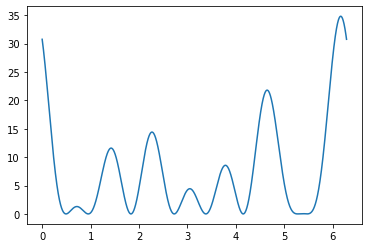

In [47]:
import numpy as np 
import scipy as sp 
n1=10000
x=np.linspace(0,2*np.pi,n1)
y=((1+2*np.sin(x+2)+3*np.sin(4*x+2))*((1+2*np.sin(x+2))+(3*np.sin(4*x+2))))
plt.plot(x,y)

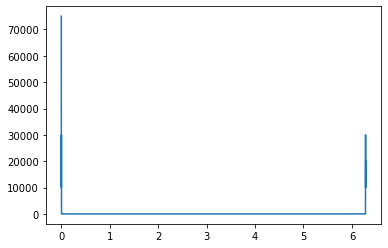

In [48]:
ft=FFT.fft(y)
plt.plot(x,np.abs(ft))

C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-10.0, 10.0)

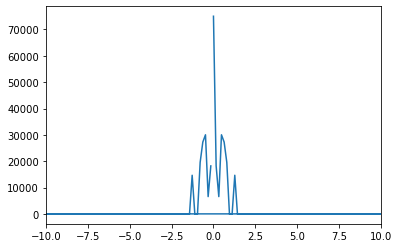

In [49]:
dt=x[1]-x[0]
ff=FFT.fftfreq(n1,dt)
plt.plot(ff,ft)
plt.xlim(-10,10)

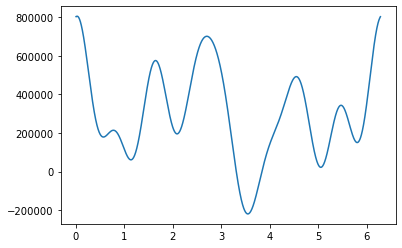

In [54]:
y1=np.zeros(n1)
y2=np.zeros(n1)
T=2*np.pi
w=(2*np.pi)/T

for i in range(n1):
    if i % 2 == 0: 
       y += np.abs(ft[i])*np.cos(i*x*w)
    if i % 2 != 0:
       y += np.abs(ft[i])*np.sin(i*x*w)
      
    
plt.plot(x,y)
